In [47]:
import os
import pandas as pd
#importación de librerias
import numpy as np;
#libreria para graficar
#tipo matlab: pyplot
#objetual: figure, axes
import matplotlib.pyplot as plt
from csv import reader as reader_csv;
import scipy.signal as signal;
import scipy.io as sio;
import numpy as np;
import glob
import pandas as pd
import math
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro , levene, mannwhitneyu

carpeta = 'EMG_data_for_gestures-master'
ruta_absoluta = os.path.abspath(carpeta)

In [48]:
data_folder = 'EMG_data_for_gestures-master'  # Carpeta principal

all_data = []  # Lista para almacenar los datos de todos los sujetos

# Iterar sobre cada carpeta numerada
for subject_folder in os.listdir(data_folder):
    subject_path = os.path.join(data_folder, subject_folder)
    if os.path.isdir(subject_path):
        # Iterar sobre los archivos de datos en cada carpeta de sujeto
        for data_file in os.listdir(subject_path):
            if data_file.endswith('.txt') and data_file.startswith('1_raw'):
                file_path = os.path.join(subject_path, data_file)
                # Leer el archivo de datos y convertirlo en un DataFrame de Pandas
                data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
                data.columns = ['tiempo'] + [f'canal_{i}' for i in range(1, 9)] + ['clase']
                data['sujeto'] = int(subject_folder)
                all_data.append(data)

# Concatenar todos los DataFrames en uno solo
all_data = pd.concat(all_data, ignore_index=True)

# Imprimir el DataFrame combinado
print(all_data)

C:\Users\ORMAN\AppData\Local\Temp\ipykernel_34148\3439332008.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_34148\3439332008.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_34148\3439332008.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_34148\3439332008.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv i

        tiempo  canal_1  canal_2  canal_3  canal_4  canal_5  canal_6  canal_7  \
0            1  0.00001 -0.00002 -0.00001 -0.00003  0.00000 -0.00001  0.00000   
1            5  0.00001 -0.00002 -0.00001 -0.00003  0.00000 -0.00001  0.00000   
2            6 -0.00001  0.00001  0.00002  0.00000  0.00001 -0.00002 -0.00001   
3            7 -0.00001  0.00001  0.00002  0.00000  0.00001 -0.00002 -0.00001   
4            8 -0.00001  0.00001  0.00002  0.00000  0.00001 -0.00002 -0.00001   
...        ...      ...      ...      ...      ...      ...      ...      ...   
935423   55298  0.00000  0.00000  0.00000 -0.00001  0.00000  0.00003 -0.00001   
935424   55299  0.00000  0.00000  0.00000 -0.00001  0.00000  0.00003 -0.00001   
935425   55300  0.00000  0.00000  0.00000 -0.00001  0.00000  0.00003 -0.00001   
935426   55301 -0.00003  0.00000 -0.00002 -0.00003  0.00000 -0.00004 -0.00002   
935427   55302 -0.00001  0.00002  0.00002  0.00000  0.00000  0.00000 -0.00002   

        canal_8  clase  suj

C:\Users\ORMAN\AppData\Local\Temp\ipykernel_34148\3439332008.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)


In [49]:
all_data.columns

Index(['tiempo', 'canal_1', 'canal_2', 'canal_3', 'canal_4', 'canal_5',
       'canal_6', 'canal_7', 'canal_8', 'clase', 'sujeto'],
      dtype='object')

In [53]:
df_tkeo=all_data.copy()

In [54]:
df_tkeo

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
...,...,...,...,...,...,...,...,...,...,...,...
935423,55298,0.00000,0.00000,0.00000,-0.00001,0.00000,0.00003,-0.00001,0.00000,0,15
935424,55299,0.00000,0.00000,0.00000,-0.00001,0.00000,0.00003,-0.00001,0.00000,0,15
935425,55300,0.00000,0.00000,0.00000,-0.00001,0.00000,0.00003,-0.00001,0.00000,0,15
935426,55301,-0.00003,0.00000,-0.00002,-0.00003,0.00000,-0.00004,-0.00002,0.00002,0,15


In [55]:
# Función para aplicar el operador Teager-Kaiser Energy Operator (TKEO) a una señal
def tkeo(signal):
    tkeo_signal = signal**2 - np.roll(signal, 1) * np.roll(signal, -1)
    return tkeo_signal

In [56]:
def apply_tkeo(data):
    tkeo_data = data.copy()
    for col in tkeo_data.columns[2:-2]:  # Excluir la columna 'tiempo','clase' y 'sujeto'
        tkeo_data[col] = tkeo(tkeo_data[col])
    return tkeo_data

In [57]:
df_tkeo = apply_tkeo(all_data) # Datos aplicando el operador

In [58]:
df_tkeo

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,0.00001,8.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,1.000000e-10,0.000000e+00,0.000000e+00,0,1
1,5,0.00001,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10,0,1
2,6,-0.00001,3.000000e-10,6.000000e-10,0.000000e+00,1.000000e-10,2.000000e-10,1.000000e-10,2.000000e-10,0,1
3,7,-0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,1
4,8,-0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,1
...,...,...,...,...,...,...,...,...,...,...,...
935423,55298,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,15
935424,55299,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,15
935425,55300,0.00000,0.000000e+00,0.000000e+00,-2.000000e-10,0.000000e+00,2.100000e-09,-1.000000e-10,0.000000e+00,0,15
935426,55301,-0.00003,0.000000e+00,4.000000e-10,9.000000e-10,0.000000e+00,1.600000e-09,2.000000e-10,4.000000e-10,0,15


In [59]:
def rms(signal):
    return np.sqrt(np.mean(signal**2))

def variance(signal):
    return np.var(signal)

def mean_absolute_value(signal):
    return np.mean(np.abs(signal))

def mean_absolute_value_slope(signal):
    return np.mean(np.diff(np.abs(signal)))

def slope_sign_changes(signal):
    return np.sum(np.diff(np.sign(np.diff(signal))) != 0)

def wave_form_length(signal):
    return np.sum(np.abs(np.diff(signal)))

def zero_crossings(signal):
    return np.sum(np.diff(np.sign(signal)) != 0)

def extract_features(signal_multicanal):
    num_canales = signal_multicanal.shape[1]
    features = []
    for canal in range(num_canales):
        rms_val = rms(signal_multicanal[:, canal])
        var_val = variance(signal_multicanal[:, canal])
        mav_val = mean_absolute_value(signal_multicanal[:, canal])
        mav_slope_val = mean_absolute_value_slope(signal_multicanal[:, canal])
        ssc_val = slope_sign_changes(signal_multicanal[:, canal])
        wfl_val = wave_form_length(signal_multicanal[:, canal])
        zc_val = zero_crossings(signal_multicanal[:, canal])
        features.extend([rms_val, var_val, mav_val, mav_slope_val, ssc_val, wfl_val, zc_val])
    return np.array(features)

In [60]:
def calculate_metrics(signal):
    rms_val = rms(signal)
    var_val = variance(signal)
    mav_val = mean_absolute_value(signal)
    mav_slope_val = mean_absolute_value_slope(signal)
    ssc_val = slope_sign_changes(signal)
    wfl_val = wave_form_length(signal)
    zc_val = zero_crossings(signal)
    return [rms_val, var_val, mav_val, mav_slope_val, ssc_val, wfl_val, zc_val]


In [66]:
# Inicializar un DataFrame vacío para almacenar los datos organizados
columns = pd.MultiIndex.from_product([['RMS', 'Variance', 'MAV', 'MAV Slope', 'SSC', 'WL', 'ZC'], [f'Channel_{i}' for i in range(1, 9)]])
index = pd.MultiIndex.from_product([range(1, 16), range(8)])
data = np.zeros((len(index), len(columns)))
df_metrics = pd.DataFrame(data, index=index, columns=columns)

# Iterar sobre cada sujeto y clase para calcular las métricas
for sujeto in range(1, 16):
    for clase in range(8):
        # Filtrar los datos del sujeto y clase actuales
        data_subset = all_data[(all_data['sujeto'] == sujeto) & (all_data['clase'] == clase)]

        # Iterar sobre cada canal para calcular las métricas
        for canal in range(1, 9):
            channel_data = data_subset[f'canal_{canal}'].values
            rms, variance, mav, mav_slope, ssc, wl, zc = calculate_metrics(channel_data)
            df_metrics.loc[(sujeto, clase), ('RMS', f'Channel_{canal}')] = rms
            df_metrics.loc[(sujeto, clase), ('Variance', f'Channel_{canal}')] = variance
            df_metrics.loc[(sujeto, clase), ('MAV', f'Channel_{canal}')] = mav
            df_metrics.loc[(sujeto, clase), ('MAV Slope', f'Channel_{canal}')] = mav_slope
            df_metrics.loc[(sujeto, clase), ('SSC', f'Channel_{canal}')] = ssc
            df_metrics.loc[(sujeto, clase), ('WL', f'Channel_{canal}')] = wl
            df_metrics.loc[(sujeto, clase), ('ZC', f'Channel_{canal}')] = zc

# Mostrar el DataFrame con las métricas calculadas
print(df_metrics)

c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(

           RMS                                                              \
     Channel_1 Channel_2 Channel_3 Channel_4 Channel_5 Channel_6 Channel_7   
1  0  0.000138  0.000129  0.000119  0.000151  0.000186  0.000156  0.000136   
   1  0.000017  0.000028  0.000037  0.000021  0.000016  0.000016  0.000014   
   2  0.000223  0.000115  0.000194  0.000150  0.000158  0.000214  0.000236   
   3  0.000185  0.000227  0.000074  0.000066  0.000154  0.000095  0.000079   
   4  0.000052  0.000084  0.000129  0.000244  0.000393  0.000257  0.000108   
...        ...       ...       ...       ...       ...       ...       ...   
15 3  0.000160  0.000406  0.000125  0.000050  0.000206  0.000230  0.000082   
   4  0.000068  0.000051  0.000082  0.000185  0.000619  0.000599  0.000195   
   5  0.000029  0.000131  0.000038  0.000099  0.000507  0.000227  0.000081   
   6  0.000093  0.000038  0.000040  0.000074  0.000422  0.000481  0.000208   
   7       NaN       NaN       NaN       NaN       NaN       NaN

In [63]:
# Agregar las columnas de métricas al DataFrame original 'all_data'
for sujeto in range(1, 16):
    for clase in range(8):
        # Obtener el índice correspondiente al sujeto y clase actual
        index = (all_data['sujeto'] == sujeto) & (all_data['clase'] == clase)
        # Obtener las métricas para el sujeto y clase actual
        metrics_row = df_metrics.loc[(sujeto, clase)]
        # Agregar las métricas al DataFrame original
        all_data.loc[index, metrics_row.index] = metrics_row.values

# Mostrar el DataFrame original con las métricas agregadas
print(all_data)


        tiempo  canal_1  canal_2  canal_3  canal_4  canal_5  canal_6  canal_7  \
0            1  0.00001 -0.00002 -0.00001 -0.00003  0.00000 -0.00001  0.00000   
1            5  0.00001 -0.00002 -0.00001 -0.00003  0.00000 -0.00001  0.00000   
2            6 -0.00001  0.00001  0.00002  0.00000  0.00001 -0.00002 -0.00001   
3            7 -0.00001  0.00001  0.00002  0.00000  0.00001 -0.00002 -0.00001   
4            8 -0.00001  0.00001  0.00002  0.00000  0.00001 -0.00002 -0.00001   
...        ...      ...      ...      ...      ...      ...      ...      ...   
935423   55298  0.00000  0.00000  0.00000 -0.00001  0.00000  0.00003 -0.00001   
935424   55299  0.00000  0.00000  0.00000 -0.00001  0.00000  0.00003 -0.00001   
935425   55300  0.00000  0.00000  0.00000 -0.00001  0.00000  0.00003 -0.00001   
935426   55301 -0.00003  0.00000 -0.00002 -0.00003  0.00000 -0.00004 -0.00002   
935427   55302 -0.00001  0.00002  0.00002  0.00000  0.00000  0.00000 -0.00002   

        canal_8  clase  ...

In [65]:
all_data


,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,...,"(WL, Channel_7)","(WL, Channel_8)","(ZC, Channel_1)","(ZC, Channel_2)","(ZC, Channel_3)","(ZC, Channel_4)","(ZC, Channel_5)","(ZC, Channel_6)","(ZC, Channel_7)","(ZC, Channel_8)"
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935423,55298,0.00000,0.00000,0.00000,-0.00001,0.00000,0.00003,-0.00001,0.00000,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0
935424,55299,0.00000,0.00000,0.00000,-0.00001,0.00000,0.00003,-0.00001,0.00000,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0
935425,55300,0.00000,0.00000,0.00000,-0.00001,0.00000,0.00003,-0.00001,0.00000,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0
935426,55301,-0.00003,0.00000,-0.00002,-0.00003,0.00000,-0.00004,-0.00002,0.00002,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0


In [69]:
# Inicializar un DataFrame vacío para almacenar los datos organizados
columns = pd.MultiIndex.from_product([['RMS', 'Variance', 'MAV', 'MAV Slope', 'SSC', 'WL', 'ZC'], [f'Channel_{i}' for i in range(1, 9)]])
index = pd.MultiIndex.from_product([range(1, 16), range(8)])
data = np.zeros((len(index), len(columns)))
df_metrics_tkeo = pd.DataFrame(data, index=index, columns=columns)

# Iterar sobre cada sujeto y clase para calcular las métricas
for sujeto in range(1, 16):
    for clase in range(8):
        # Filtrar los datos del sujeto y clase actuales en df_tkeo
        data_subset_tkeo = df_tkeo[(df_tkeo['sujeto'] == sujeto) & (df_tkeo['clase'] == clase)]

        # Iterar sobre cada canal para calcular las métricas
        for canal in range(1, 9):
            channel_data_tkeo = data_subset_tkeo[f'canal_{canal}'].values
            rms, variance, mav, mav_slope, ssc, wl, zc = calculate_metrics(channel_data_tkeo)
            df_metrics_tkeo.loc[(sujeto, clase), ('RMS', f'Channel_{canal}')] = rms
            df_metrics_tkeo.loc[(sujeto, clase), ('Variance', f'Channel_{canal}')] = variance
            df_metrics_tkeo.loc[(sujeto, clase), ('MAV', f'Channel_{canal}')] = mav
            df_metrics_tkeo.loc[(sujeto, clase), ('MAV Slope', f'Channel_{canal}')] = mav_slope
            df_metrics_tkeo.loc[(sujeto, clase), ('SSC', f'Channel_{canal}')] = ssc
            df_metrics_tkeo.loc[(sujeto, clase), ('WL', f'Channel_{canal}')] = wl
            df_metrics_tkeo.loc[(sujeto, clase), ('ZC', f'Channel_{canal}')] = zc

# Mostrar el DataFrame con las métricas calculadas para df_tkeo
print(df_metrics_tkeo)


c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(

           RMS                                                          \
     Channel_1     Channel_2     Channel_3     Channel_4     Channel_5   
1  0  0.000138  4.706363e-08  4.426181e-08  6.139595e-08  8.004805e-08   
   1  0.000017  6.175412e-10  1.229625e-09  3.627423e-10  1.568624e-10   
   2  0.000223  1.394133e-08  3.777085e-08  1.977259e-08  2.321590e-08   
   3  0.000185  4.346832e-08  5.040071e-09  4.011786e-09  2.323485e-08   
   4  0.000052  7.663082e-09  2.477414e-08  5.621062e-08  1.201494e-07   
...        ...           ...           ...           ...           ...   
15 3  0.000160  1.497824e-07  1.526436e-08  2.257565e-09  4.331508e-08   
   4  0.000068  2.292589e-09  5.780606e-09  2.871480e-08  2.984744e-07   
   5  0.000029  2.461637e-08  1.438799e-09  8.931149e-09  2.116653e-07   
   6  0.000093  1.275170e-09  1.441282e-09  4.781296e-09  1.536497e-07   
   7       NaN           NaN           NaN           NaN           NaN   

                                     

In [70]:
for sujeto in range(1, 16):
    for clase in range(8):
        # Obtener el índice correspondiente al sujeto y clase actual
        index = (df_tkeo['sujeto'] == sujeto) & (df_tkeo['clase'] == clase)
        # Obtener las métricas para el sujeto y clase actual
        metrics_row = df_metrics.loc[(sujeto, clase)]
        # Agregar las métricas al DataFrame original
        df_tkeo.loc[index, metrics_row.index] = metrics_row.values

# Mostrar el DataFrame original con las métricas agregadas
print(df_tkeo)

        tiempo  canal_1       canal_2       canal_3       canal_4  \
0            1  0.00001  8.000000e-10  3.000000e-10  9.000000e-10   
1            5  0.00001  6.000000e-10  3.000000e-10  9.000000e-10   
2            6 -0.00001  3.000000e-10  6.000000e-10  0.000000e+00   
3            7 -0.00001  0.000000e+00  0.000000e+00  0.000000e+00   
4            8 -0.00001  0.000000e+00  0.000000e+00  0.000000e+00   
...        ...      ...           ...           ...           ...   
935423   55298  0.00000  0.000000e+00  0.000000e+00  0.000000e+00   
935424   55299  0.00000  0.000000e+00  0.000000e+00  0.000000e+00   
935425   55300  0.00000  0.000000e+00  0.000000e+00 -2.000000e-10   
935426   55301 -0.00003  0.000000e+00  4.000000e-10  9.000000e-10   
935427   55302 -0.00001  4.000000e-10  2.000000e-10 -9.000000e-10   

             canal_5       canal_6       canal_7       canal_8  clase  ...  \
0       0.000000e+00  1.000000e-10  0.000000e+00  0.000000e+00      0  ...   
1       0.00000

In [71]:
df_tkeo


,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,...,"(WL, Channel_7)","(WL, Channel_8)","(ZC, Channel_1)","(ZC, Channel_2)","(ZC, Channel_3)","(ZC, Channel_4)","(ZC, Channel_5)","(ZC, Channel_6)","(ZC, Channel_7)","(ZC, Channel_8)"
0,1,0.00001,8.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,1.000000e-10,0.000000e+00,0.000000e+00,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
1,5,0.00001,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
2,6,-0.00001,3.000000e-10,6.000000e-10,0.000000e+00,1.000000e-10,2.000000e-10,1.000000e-10,2.000000e-10,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
3,7,-0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
4,8,-0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935423,55298,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0
935424,55299,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0
935425,55300,0.00000,0.000000e+00,0.000000e+00,-2.000000e-10,0.000000e+00,2.100000e-09,-1.000000e-10,0.000000e+00,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0
935426,55301,-0.00003,0.000000e+00,4.000000e-10,9.000000e-10,0.000000e+00,1.600000e-09,2.000000e-10,4.000000e-10,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0


In [95]:
df_tkeo

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,...,"(WL, Channel_7)","(WL, Channel_8)","(ZC, Channel_1)","(ZC, Channel_2)","(ZC, Channel_3)","(ZC, Channel_4)","(ZC, Channel_5)","(ZC, Channel_6)","(ZC, Channel_7)","(ZC, Channel_8)"
0,1,0.00001,8.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,1.000000e-10,0.000000e+00,0.000000e+00,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
1,5,0.00001,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
2,6,-0.00001,3.000000e-10,6.000000e-10,0.000000e+00,1.000000e-10,2.000000e-10,1.000000e-10,2.000000e-10,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
3,7,-0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
4,8,-0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0.40477,0.42453,2538.0,2651.0,2682.0,2628.0,2365.0,2303.0,2389.0,2393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935423,55298,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0
935424,55299,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0
935425,55300,0.00000,0.000000e+00,0.000000e+00,-2.000000e-10,0.000000e+00,2.100000e-09,-1.000000e-10,0.000000e+00,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0
935426,55301,-0.00003,0.000000e+00,4.000000e-10,9.000000e-10,0.000000e+00,1.600000e-09,2.000000e-10,4.000000e-10,0,...,0.40708,0.40463,2038.0,1966.0,2125.0,2116.0,1934.0,2036.0,2055.0,2034.0


In [73]:
# Seleccionar solo las columnas 1 a 8 de df_tkeo y convertirlas en un array
tkeoa = np.array(df_tkeo.iloc[:, 1:9])

# Seleccionar solo las columnas 1 a 8 de all_data y convertirlas en un array
emg_original = np.array(all_data.iloc[:, 1:9])

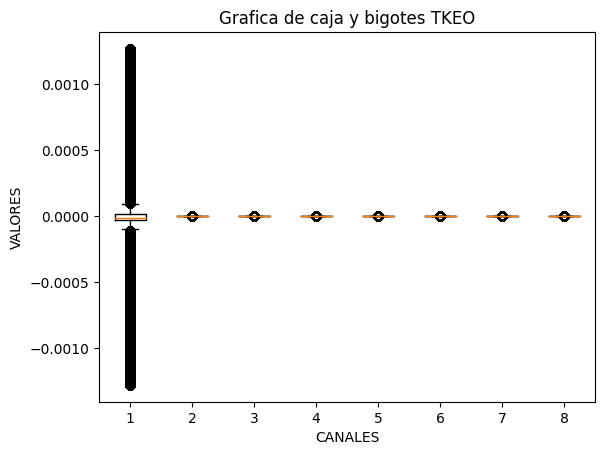

In [74]:
#se gráfica todos los canales 
plt.boxplot(tkeoa)
plt.title('Grafica de caja y bigotes TKEO') 
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.show()

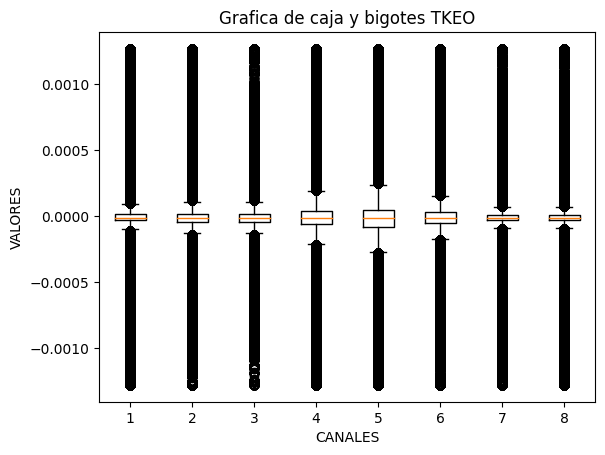

In [78]:
#se gráfica todos los canales 
plt.boxplot(emg_original)
plt.title('Grafica de caja y bigotes TKEO') 
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.show()

In [75]:
# Seleccionar solo las columnas 1 a 8 de df_tkeo y convertirlas en un array
tkeorms = np.array(df_tkeo.iloc[:, 11:19])

# Seleccionar solo las columnas 1 a 8 de all_data y convertirlas en un array
emg_original_rms = np.array(all_data.iloc[:, 11:19])

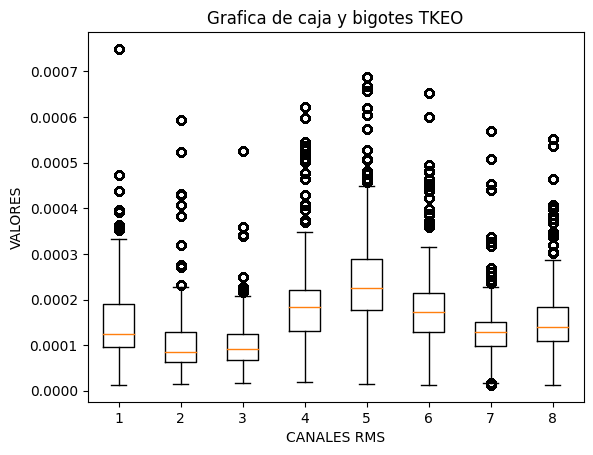

In [77]:
#se gráfica todos los canales 
plt.boxplot(tkeorms)
plt.title('Grafica de caja y bigotes TKEO') 
plt.xlabel('CANALES RMS')
plt.ylabel('VALORES')
plt.show()

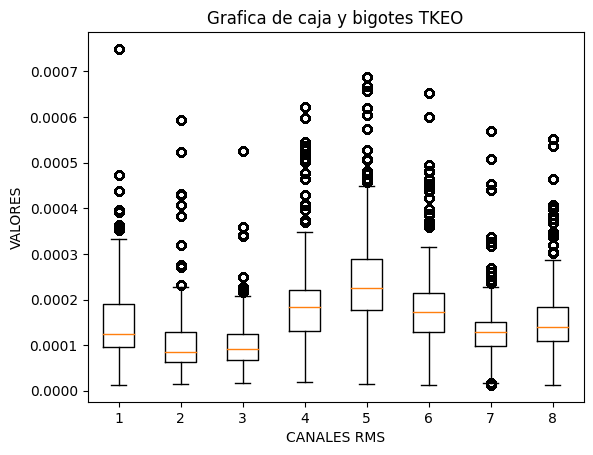

In [79]:
#se gráfica todos los canales 
plt.boxplot(emg_original_rms)
plt.title('Grafica de caja y bigotes TKEO') 
plt.xlabel('CANALES RMS')
plt.ylabel('VALORES')
plt.show()

In [80]:
# Seleccionar solo las columnas 1 a 8 de df_tkeo y convertirlas en un array
tkeovar = np.array(df_tkeo.iloc[:, 19:27])

# Seleccionar solo las columnas 1 a 8 de all_data y convertirlas en un array
emg_original_var = np.array(all_data.iloc[:, 19:27])

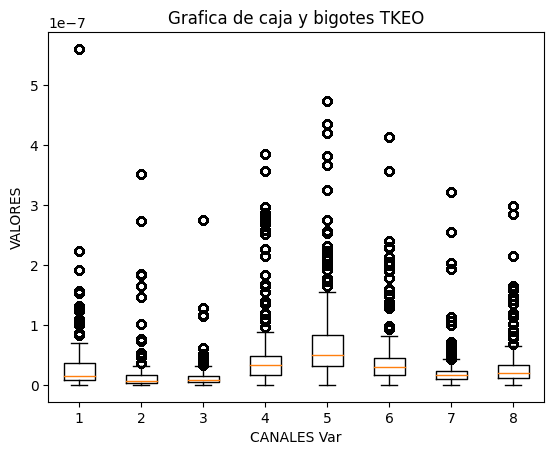

In [81]:
#se gráfica todos los canales 
plt.boxplot(emg_original_var)
plt.title('Grafica de caja y bigotes TKEO') 
plt.xlabel('CANALES Var')
plt.ylabel('VALORES')
plt.show()

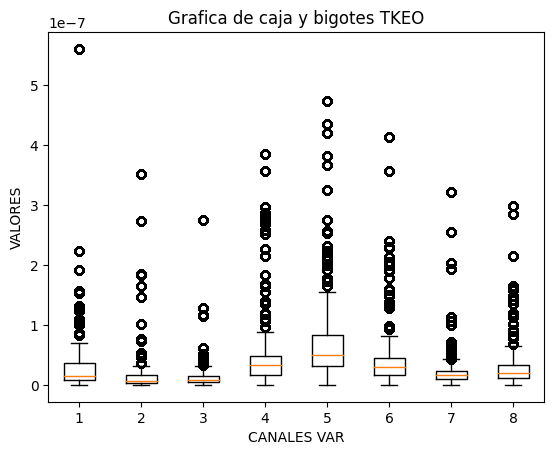

In [82]:
#se gráfica todos los canales 
plt.boxplot(tkeovar)
plt.title('Grafica de caja y bigotes TKEO') 
plt.xlabel('CANALES VAR')
plt.ylabel('VALORES')
plt.show()

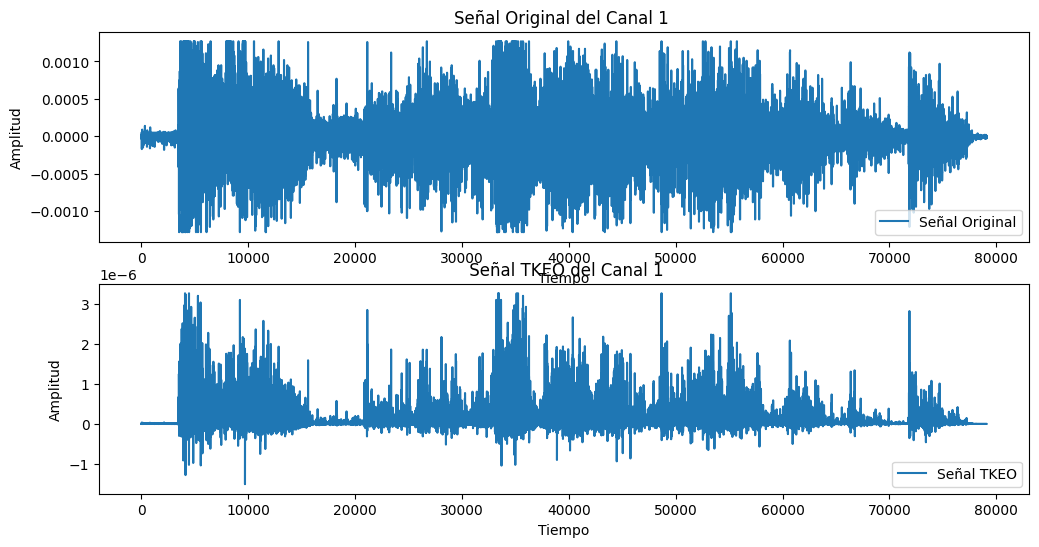

In [83]:
# Seleccionar un solo canal
canal_seleccionado = 'canal_1'
# Aplicar TKEO al canal seleccionado
tkeo_canal = tkeo(all_data[canal_seleccionado])

# Visualizar el resultado
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(all_data['tiempo'], all_data[canal_seleccionado], label='Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Original del Canal 1 ')
plt.legend()
plt.subplot(212)
plt.plot(all_data['tiempo'], tkeo_canal, label='Señal TKEO')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title(' Señal TKEO del Canal 1')
plt.legend()
plt.show()
#Separar por sujetos para no solapart muestras (separar el dataframe)

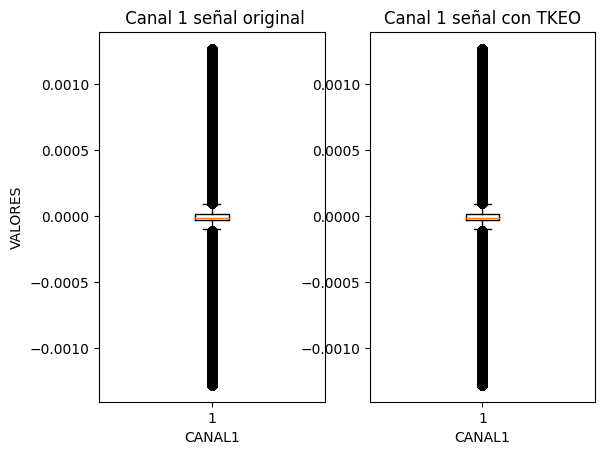

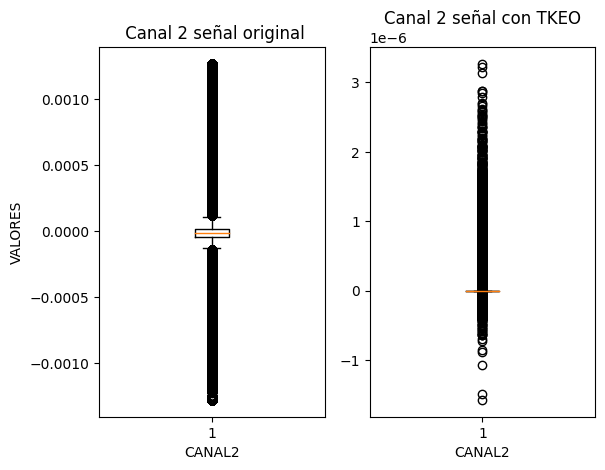

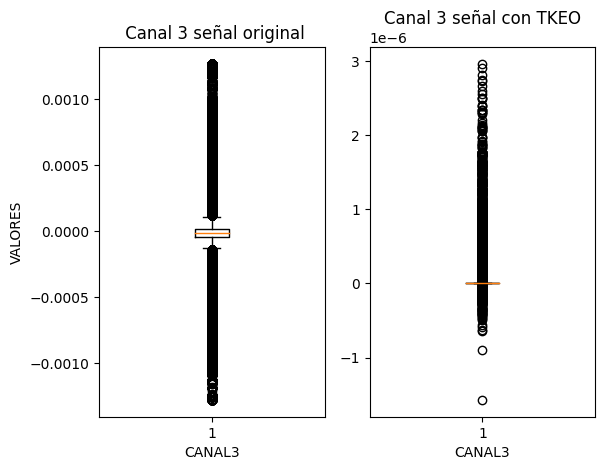

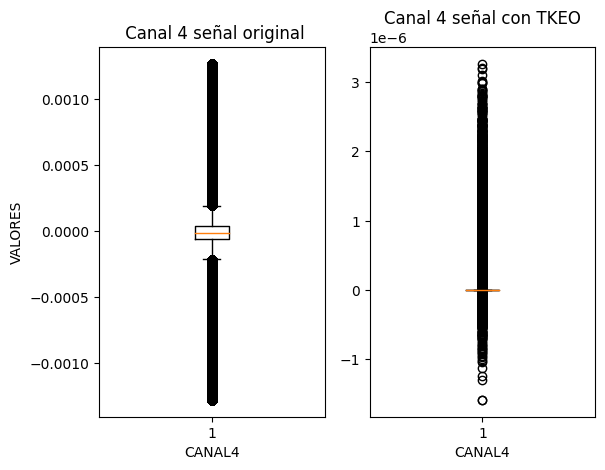

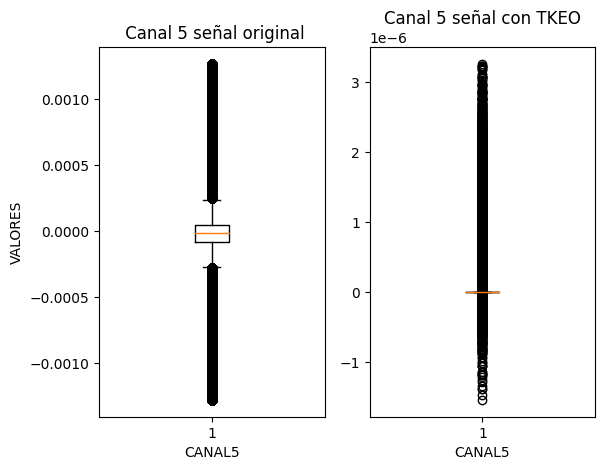

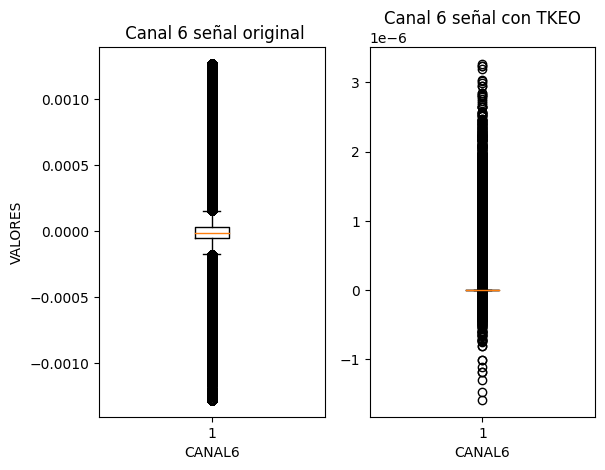

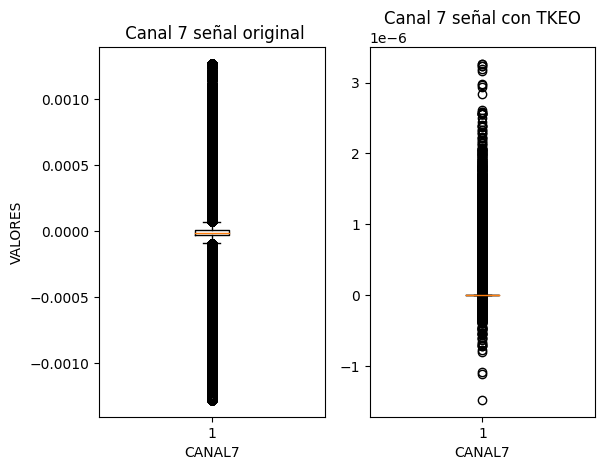

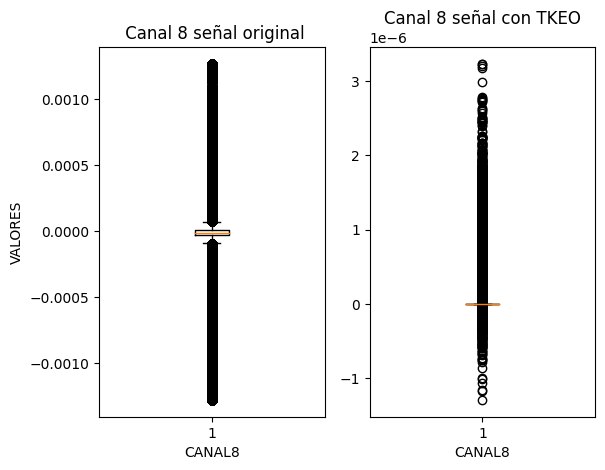

In [84]:
labels = ['Original', 'Takeo']  
for j in range(1, 9):  # Se recorren los canales de cada una de las poblaciones 
    data1= np.squeeze(all_data.iloc[:, j])
    data2 = np.squeeze(df_tkeo.iloc[:, j])

    plt.subplot(121)
    plt.boxplot(data1)
    plt.title(" Canal " + str(j) + " señal original")  # Se grafica canal a canal 
    plt.xlabel('CANAL'+ str(j))
    plt.ylabel('VALORES')
    #plt.boxplot(data,labels=labels)
    plt.subplot(122)
    plt.boxplot(data2)
    plt.title("Canal " + str(j) + " señal con TKEO")  # Se grafica canal a canal 
    plt.xlabel('CANAL'+ str(j))
    plt.show()
    

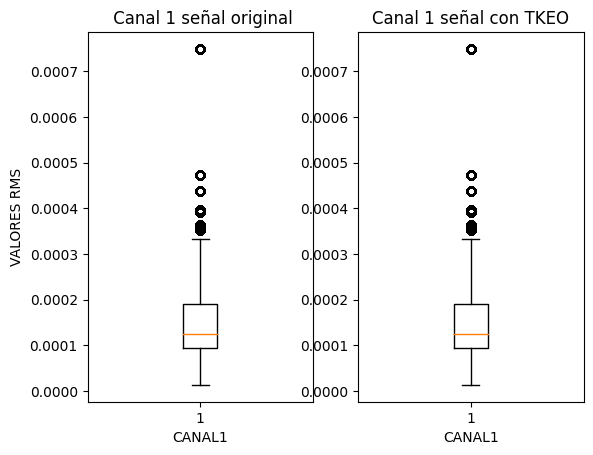

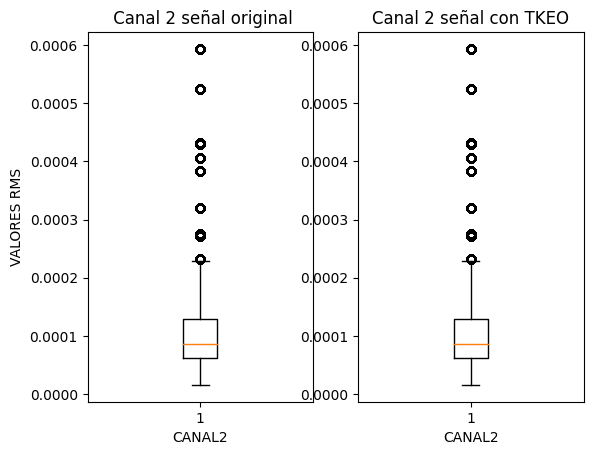

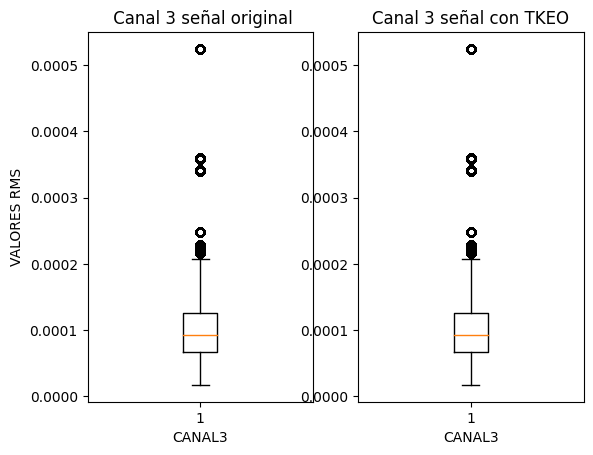

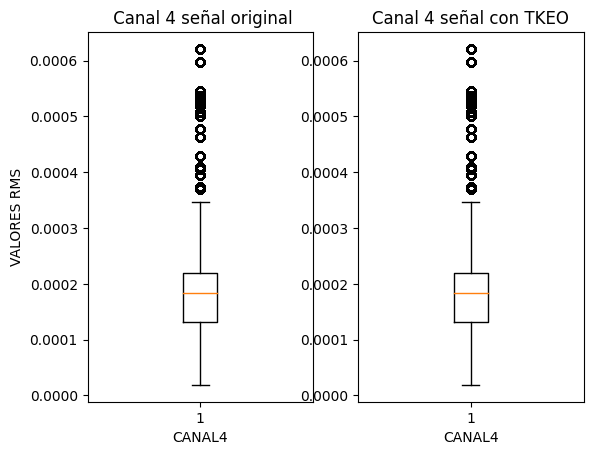

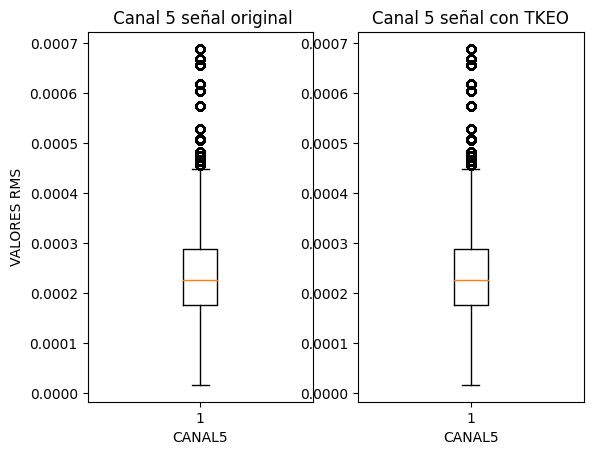

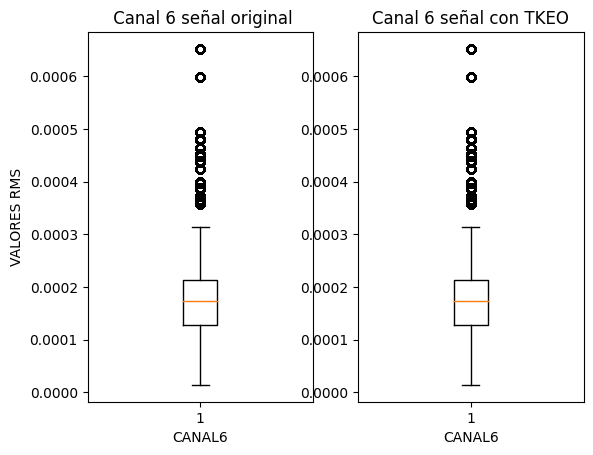

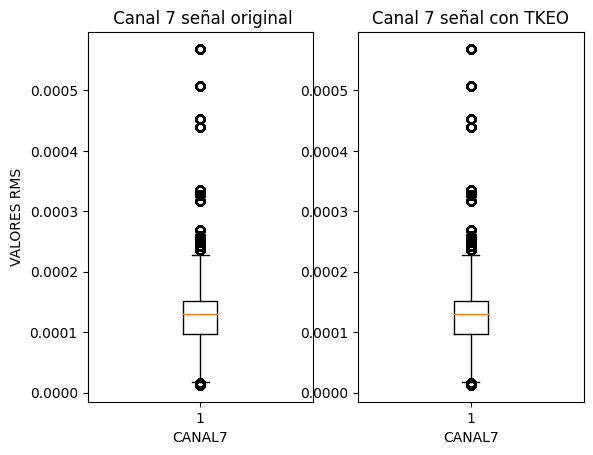

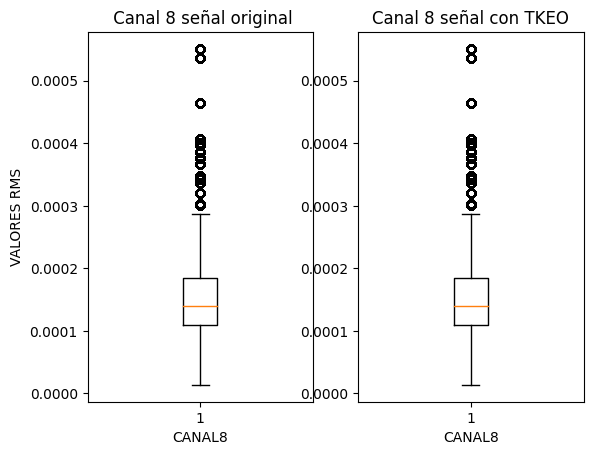

In [86]:
labels = ['Original', 'Takeo']  
for j in range(11, 19):  # Se recorren los canales de cada una de las poblaciones 
    data1= np.squeeze(all_data.iloc[:, j])
    data2 = np.squeeze(df_tkeo.iloc[:, j])

    plt.subplot(121)
    plt.boxplot(data1)
    plt.title(" Canal " + str(j-10) + " señal original")  # Se grafica canal a canal 
    plt.xlabel('CANAL'+ str(j-10))
    plt.ylabel('VALORES RMS')
    #plt.boxplot(data,labels=labels)
    plt.subplot(122)
    plt.boxplot(data2)
    plt.title("Canal " + str(j-10) + " señal con TKEO")  # Se grafica canal a canal 
    plt.xlabel('CANAL'+ str(j-10))
    plt.show()

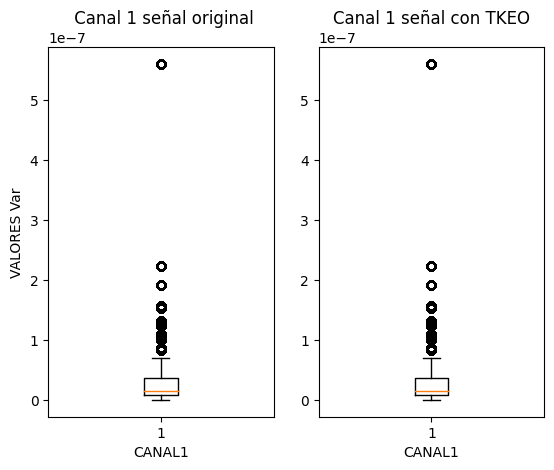

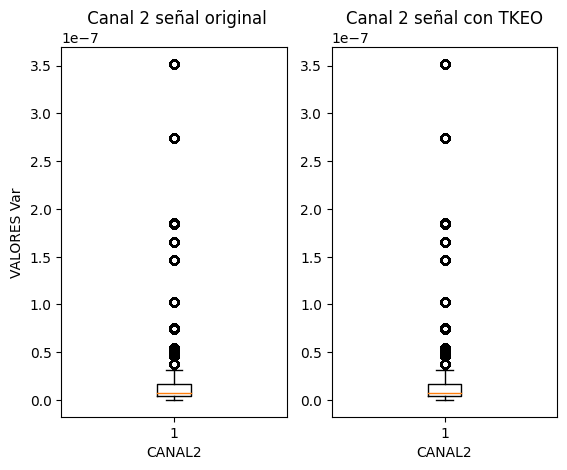

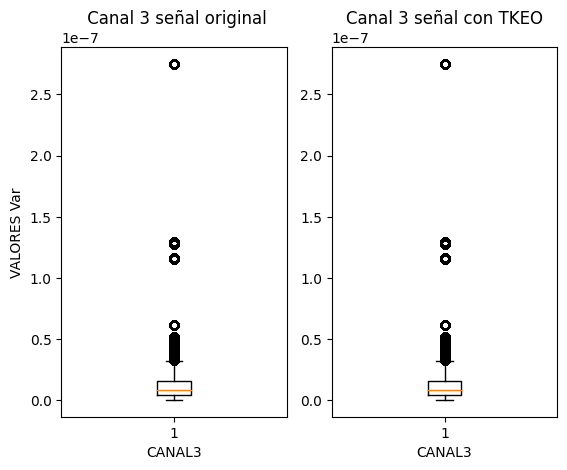

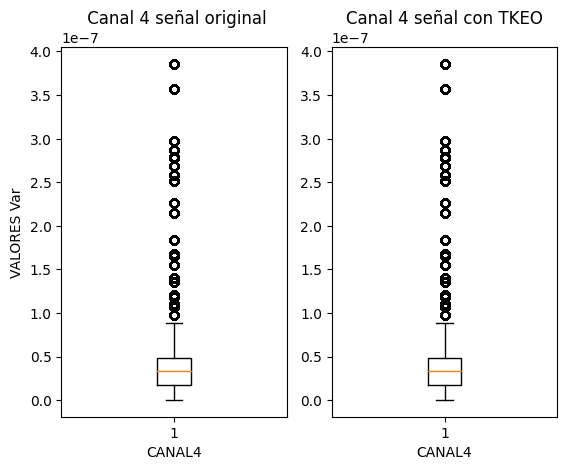

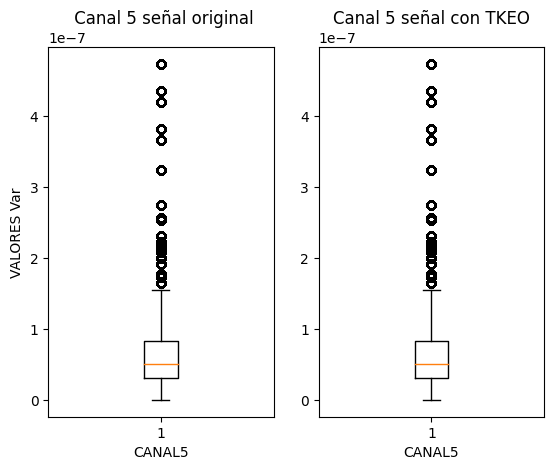

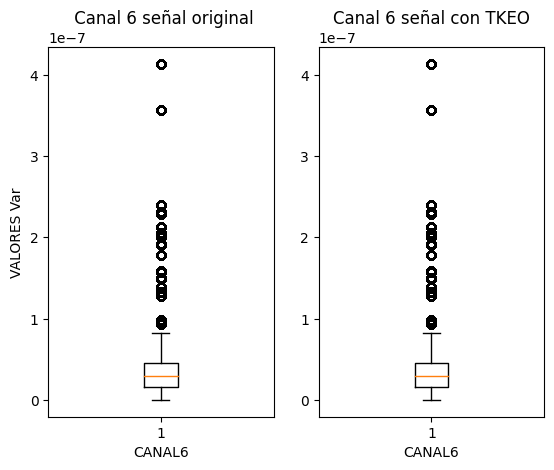

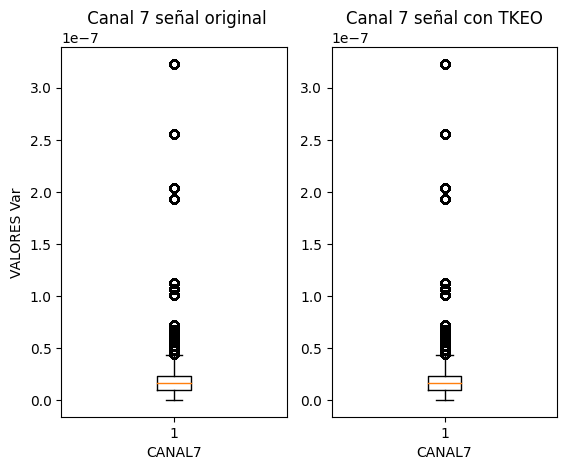

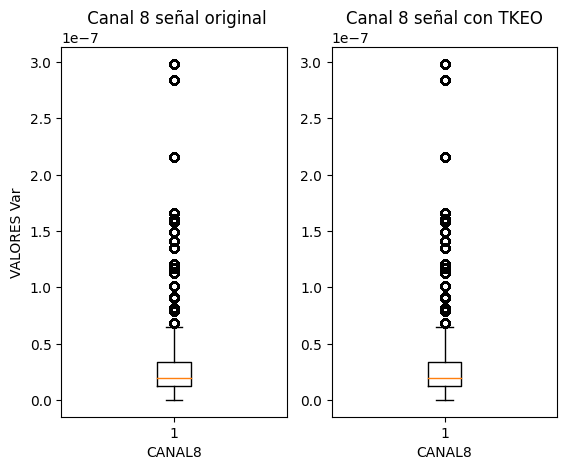

In [87]:
labels = ['Original', 'Takeo']  
for j in range(19, 27):  # Se recorren los canales de cada una de las poblaciones 
    data1= np.squeeze(all_data.iloc[:, j])
    data2 = np.squeeze(df_tkeo.iloc[:, j])

    plt.subplot(121)
    plt.boxplot(data1)
    plt.title(" Canal " + str(j-18) + " señal original")  # Se grafica canal a canal 
    plt.xlabel('CANAL'+ str(j-18))
    plt.ylabel('VALORES Var')
    #plt.boxplot(data,labels=labels)
    plt.subplot(122)
    plt.boxplot(data2)
    plt.title("Canal " + str(j-18) + " señal con TKEO")  # Se grafica canal a canal 
    plt.xlabel('CANAL'+ str(j-18))
    plt.show()

In [90]:
group = all_data.groupby('clase')

clases = []
for clase, data_frame in group:
    clases.append(data_frame.values)
clase0 = group.get_group(0)
clase1 = group.get_group(1)
clase2 = group.get_group(2)
clase3 = group.get_group(3)
clase4 = group.get_group(4)
clase5 = group.get_group(5)
clase6 = group.get_group(6)
clase7 = group.get_group(7) 


group_tkeo = df_tkeo.groupby('clase')

clases = []
for clase, data_frame in group:
    clases.append(data_frame.values)
clase0_tkeo = group.get_group(0)
clase1_tkeo = group.get_group(1)
clase2_tkeo = group.get_group(2)
clase3_tkeo = group.get_group(3)
clase4_tkeo = group.get_group(4)
clase5_tkeo = group.get_group(5)
clase6_tkeo = group.get_group(6)
clase7_tkeo = group.get_group(7) 

In [91]:
da_o0 = np.array(clase0.iloc[:, 1:9])
da_t0 = np.array(clase0_tkeo.iloc[:, 1:9])

Text(0.5, 1.0, 'TKEO')

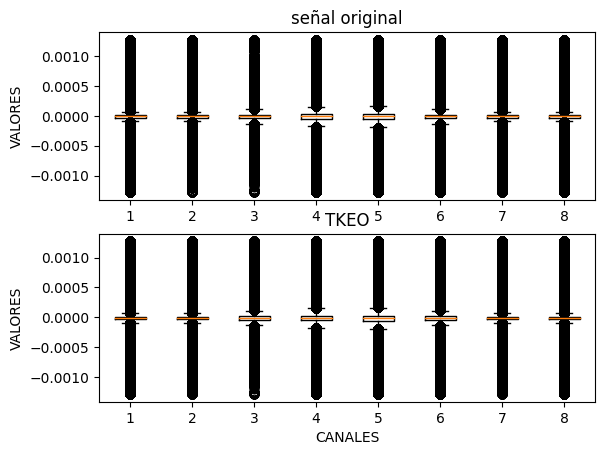

In [92]:
#se gráfica todos los clase 0
plt.subplot(211)
plt.boxplot(da_o0)
plt.ylabel('VALORES')
plt.title("señal original")  # Se grafica canal a canal
plt.subplot(212)
plt.boxplot(da_t0)
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.title('TKEO') 


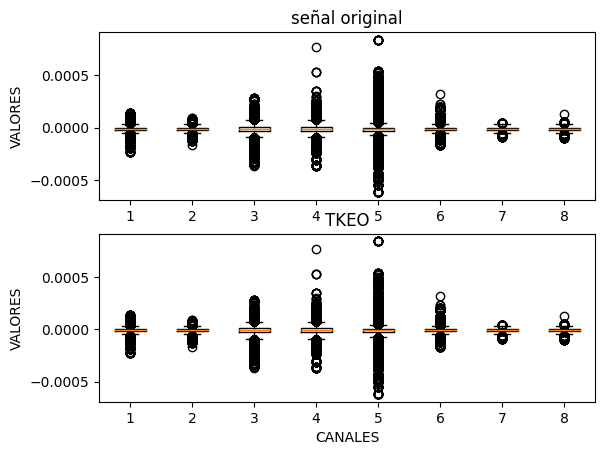

In [94]:
da_o1 = np.array(clase1.iloc[:, 1:9])
da_t1 = np.array(clase1_tkeo.iloc[:, 1:9])
#se gráfica todos los clase 1
plt.subplot(211)
plt.boxplot(da_o1)
plt.ylabel('VALORES')
plt.title("señal original")  # Se grafica canal a canal
plt.subplot(212)
plt.boxplot(da_t1)
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.title('TKEO') 

plt.show()